In [1]:
import plotly.graph_objects as go
import plotly
import json
from pathlib import Path
import numpy as np
from collections import defaultdict
import pandas as pd

In [2]:
with Path('../scandeval_benchmark_results.jsonl').open() as f:
    records = [json.loads(dct_str) for dct_str in f if dct_str.strip("\n")]
len(records)

3193

In [3]:
dataset_df = pd.DataFrame.from_records([
    {'dataset': 'swerec', 'task': 'text classification', 'language': 'sv', 'metric': 'mcc'},
    {'dataset': 'angry-tweets', 'task': 'text classification', 'language': 'da', 'metric': 'mcc'},
    {'dataset': 'norec', 'task': 'text classification', 'language': 'no', 'metric': 'mcc'},
    {'dataset': 'sb10k', 'task': 'text classification', 'language': 'de', 'metric': 'mcc'},
    {'dataset': 'dutch-social', 'task': 'text classification', 'language': 'nl', 'metric': 'mcc'},
    {'dataset': 'sst5', 'task': 'text classification', 'language': 'en', 'metric': 'mcc'},
    {'dataset': 'suc3', 'task': 'information extraction', 'language': 'sv', 'metric': 'micro_f1_no_misc'},
    {'dataset': 'dansk', 'task': 'information extraction', 'language': 'da', 'metric': 'micro_f1_no_misc'},
    {'dataset': 'norne-nb', 'task': 'information extraction', 'language': 'no', 'metric': 'micro_f1_no_misc'},
    {'dataset': 'norne-nn', 'task': 'information extraction', 'language': 'no', 'metric': 'micro_f1_no_misc'},
    {'dataset': 'mim-gold-ner', 'task': 'information extraction', 'language': 'is', 'metric': 'micro_f1_no_misc'},
    {'dataset': 'fone', 'task': 'information extraction', 'language': 'fo', 'metric': 'micro_f1_no_misc'},
    {'dataset': 'germeval', 'task': 'information extraction', 'language': 'de', 'metric': 'micro_f1_no_misc'},
    {'dataset': 'conll-nl', 'task': 'information extraction', 'language': 'nl', 'metric': 'micro_f1_no_misc'},
    {'dataset': 'conll-en', 'task': 'information extraction', 'language': 'en', 'metric': 'micro_f1_no_misc'},
    {'dataset': 'scala-sv', 'task': 'grammar', 'language': 'sv', 'metric': 'mcc'},
    {'dataset': 'scala-da', 'task': 'grammar', 'language': 'da', 'metric': 'mcc'},
    {'dataset': 'scala-nb', 'task': 'grammar', 'language': 'no', 'metric': 'mcc'},
    {'dataset': 'scala-nn', 'task': 'grammar', 'language': 'no', 'metric': 'mcc'},
    {'dataset': 'scala-is', 'task': 'grammar', 'language': 'is', 'metric': 'mcc'},
    {'dataset': 'scala-fo', 'task': 'grammar', 'language': 'fo', 'metric': 'mcc'},
    {'dataset': 'scala-de', 'task': 'grammar', 'language': 'de', 'metric': 'mcc'},
    {'dataset': 'scala-nl', 'task': 'grammar', 'language': 'nl', 'metric': 'mcc'},
    {'dataset': 'scala-en', 'task': 'grammar', 'language': 'en', 'metric': 'mcc'},
    {'dataset': 'scandiqa-da', 'task': 'question answering', 'language': 'da', 'metric': 'em'},
    {'dataset': 'norquad', 'task': 'question answering', 'language': 'no', 'metric': 'em'},
    {'dataset': 'scandiqa-sv', 'task': 'question answering', 'language': 'sv', 'metric': 'em'},
    {'dataset': 'nqii', 'task': 'question answering', 'language': 'is', 'metric': 'em'},
    {'dataset': 'germanquad', 'task': 'question answering', 'language': 'de', 'metric': 'em'},
    {'dataset': 'squad', 'task': 'question answering', 'language': 'en', 'metric': 'em'},
    {'dataset': 'squad-nl', 'task': 'question answering', 'language': 'nl', 'metric': 'em'},
    {'dataset': 'nordjylland-news', 'task': 'summarisation', 'language': 'da', 'metric': 'bertscore'},
    {'dataset': 'mlsum', 'task': 'summarisation', 'language': 'de', 'metric': 'bertscore'},
    {'dataset': 'rrn', 'task': 'summarisation', 'language': 'is', 'metric': 'bertscore'},
    {'dataset': 'no-sammendrag', 'task': 'summarisation', 'language': 'no', 'metric': 'bertscore'},
    {'dataset': 'wiki-lingua-nl', 'task': 'summarisation', 'language': 'nl', 'metric': 'bertscore'},
    {'dataset': 'swedn', 'task': 'summarisation', 'language': 'sv', 'metric': 'bertscore'},
    {'dataset': 'cnn-dailymail', 'task': 'summarisation', 'language': 'en', 'metric': 'bertscore'},
    {'dataset': 'mmlu-da', 'task': 'knowledge', 'language': 'da', 'metric': 'accuracy'},
    {'dataset': 'mmlu-no', 'task': 'knowledge', 'language': 'no', 'metric': 'accuracy'},
    {'dataset': 'mmlu-sv', 'task': 'knowledge', 'language': 'sv', 'metric': 'accuracy'},
    {'dataset': 'mmlu-is', 'task': 'knowledge', 'language': 'is', 'metric': 'accuracy'},
    {'dataset': 'mmlu-de', 'task': 'knowledge', 'language': 'de', 'metric': 'accuracy'},
    {'dataset': 'mmlu-nl', 'task': 'knowledge', 'language': 'nl', 'metric': 'accuracy'},
    {'dataset': 'mmlu', 'task': 'knowledge', 'language': 'en', 'metric': 'accuracy'},
    {'dataset': 'arc-da', 'task': 'knowledge', 'language': 'da', 'metric': 'accuracy'},
    {'dataset': 'arc-no', 'task': 'knowledge', 'language': 'no', 'metric': 'accuracy'},
    {'dataset': 'arc-sv', 'task': 'knowledge', 'language': 'sv', 'metric': 'accuracy'},
    {'dataset': 'arc-is', 'task': 'knowledge', 'language': 'is', 'metric': 'accuracy'},
    {'dataset': 'arc-de', 'task': 'knowledge', 'language': 'de', 'metric': 'accuracy'},
    {'dataset': 'arc-nl', 'task': 'knowledge', 'language': 'nl', 'metric': 'accuracy'},
    {'dataset': 'arc', 'task': 'knowledge', 'language': 'en', 'metric': 'accuracy'},
    {'dataset': 'hellaswag-da', 'task': 'reasoning', 'language': 'da', 'metric': 'accuracy'},
    {'dataset': 'hellaswag-no', 'task': 'reasoning', 'language': 'no', 'metric': 'accuracy'},
    {'dataset': 'hellaswag-sv', 'task': 'reasoning', 'language': 'sv', 'metric': 'accuracy'},
    {'dataset': 'hellaswag-is', 'task': 'reasoning', 'language': 'is', 'metric': 'accuracy'},
    {'dataset': 'hellaswag-de', 'task': 'reasoning', 'language': 'de', 'metric': 'accuracy'},
    {'dataset': 'hellaswag-nl', 'task': 'reasoning', 'language': 'nl', 'metric': 'accuracy'},
    {'dataset': 'hellaswag', 'task': 'reasoning', 'language': 'en', 'metric': 'accuracy'},
])
dataset_df.set_index('dataset', inplace=True)
dataset_df.head()

,task,language,metric
dataset,,,
swerec,text classification,sv,mcc
angry-tweets,text classification,da,mcc
norec,text classification,no,mcc
sb10k,text classification,de,mcc
dutch-social,text classification,nl,mcc


In [4]:
language_mapping = {
    'da': 'Danish', 
    'sv': 'Swedish',
    'no': 'Norwegian',
    'is': 'Icelandic',
    'fo': 'Faroese',
    'de': 'German',
    'nl': 'Dutch',
    'en': 'English',
}

In [5]:
results_dfs = dict()

for language in dataset_df.language.unique():
    data_dict = defaultdict(dict)
    for record in records:
        model = record["model"]
        dataset = record["dataset"]
        if dataset in dataset_df.index:
            if dataset_df.loc[dataset].language != language:
                continue
            task = dataset_df.loc[dataset].task
            metric = dataset_df.loc[dataset].metric
            results_dict = record['results']['total']
            score = results_dict.get(f"test_{metric}", results_dict.get(metric))
            if task in data_dict[model]:
                data_dict[model][task].append(score)
            else:
                data_dict[model][task] = [score]
    results_df = pd.DataFrame(data_dict).T.map(
        lambda list_or_nan: np.mean(list_or_nan) if list_or_nan == list_or_nan else list_or_nan
    )
    results_dfs[language] = results_df

for language, df in results_dfs.items():
    print(language, len(df))

results_dfs['da'].head()

sv 143
da 143
no 143
de 30
nl 32
en 16
is 69
fo 80


,text classification,grammar,question answering,information extraction,knowledge,reasoning,summarisation
NbAiLab/nb-bert-base,46.318746,66.408849,36.422372,70.361393,NaN,NaN,NaN
pere/roberta-base-exp-8,49.662121,60.132599,32.604644,68.767906,NaN,NaN,NaN
ltg/norbert2,39.427808,50.755320,NaN,NaN,NaN,NaN,NaN
cardiffnlp/twitter-xlm-roberta-base,45.302430,51.744944,22.014608,70.096889,NaN,NaN,NaN
Geotrend/bert-base-en-fr-de-no-da-cased,34.783474,41.080549,40.320538,63.379064,NaN,NaN,NaN


In [6]:
def create_radial_plot(
    model_ids: list[str], languages: list[str], tasks: list[str] | None = None
) -> None:
    """Creates a radial plot with the performance of the model.

    Args:
        model_ids:
            The IDs of the models to compare.
        languages:
            list of languages to compare on.
        tasks:
            The list of tasks to compare the models on. All models must have been
            evaluated on all of the tasks. If None then we find the largest set
            of tasks which all the models have been evaluated on. Defaults to None.

    Raises:
        AssertionError:
            If any of the models have not been evaluated on all of the tasks.
    """
    if tasks == None:
        tasks = dataset_df.task.unique().tolist()
        for model_id in model_ids:
            for language, results_df in results_dfs.items():
                if language not in languages:
                    continue
                tasks = list(set(tasks).intersection(results_df.loc[model_id].dropna().index.tolist()))
    
    # Add all the evaluation results for each model
    results: list[list[float]] = list()
    for model_id in model_ids:
        result_list = list()
        for task in tasks:
            win_ratios = list()
            scores = list()
            for language in languages:
                score = results_dfs[language].loc[model_id][task]
                assert score == score, f"The model {model!r} has not been benchmarked on the task {task!r}!"
                win_ratio = np.mean([
                    score >= other_score
                    for other_score in results_dfs[language][task].dropna()
                ])
                win_ratios.append(win_ratio)
                scores.append(score)
            result_list.append(np.mean(scores))
        results.append(result_list)

    # Add the results to a plotly figure
    fig = go.Figure()
    for model_id, result_list in zip(model_ids, results):
        fig.add_trace(go.Scatterpolar(
            r=result_list,
            theta=tasks,
            fill='toself',
            name=model_id,
        ))

    languages_str = ""
    if len(languages) > 1:
        languages_str = ", ".join([language_mapping[language] for language in languages[:-1]])
        languages_str += " and "
    languages_str += language_mapping[languages[-1]]

    # Builds the radial plot from the results
    margin = plotly.graph_objects.layout.Margin(l=200, r=200)
    fig.update_layout(
        polar=dict(radialaxis=dict(
            visible=True, 
            #range=[0, 100],
        )), 
        showlegend=True,
        width=1000,
        height=500,
        margin=margin,
        title=f'LLM Performance on {languages_str} Language Tasks',
    )
    
    fig.write_html('/Users/dan/Downloads/radial_plot.html')
    fig.show()

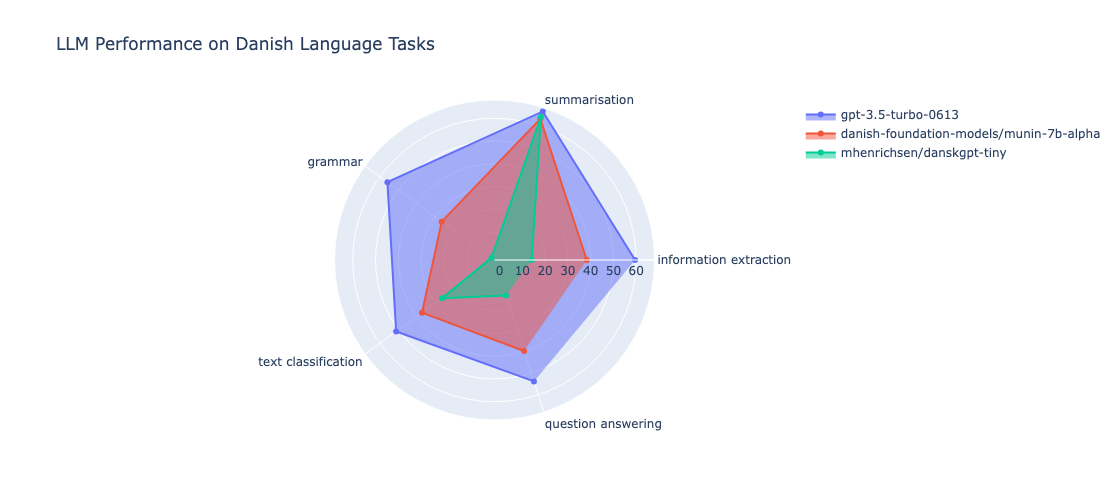

In [11]:
create_radial_plot(
    model_ids=[
        #'gpt-4-0613',
        'gpt-3.5-turbo-0613', 
        'danish-foundation-models/munin-7b-alpha',
        'mhenrichsen/danskgpt-tiny',
        #'KennethEnevoldsen/dfm-sentence-encoder-large-2',
    ],
    languages=[
        'da', 
        #'sv', 
        #'no',
    ],
    tasks=None,
)